# Lista 03 - ICs + Bootstrap

In [1]:
# -*- coding: utf 8

from matplotlib import pyplot as plt

import pandas as pd
import numpy as np

plt.style.use('seaborn-colorblind')
plt.ion()

# Exercício 01:
Vamos utilizar a base de dados de recém-nascidos disponibilizada no exercício.

In [2]:
df = pd.read_csv('baby.csv')

# Convertendo para unidades não EUA
df['Birth Weight'] = 0.0283495 * df['Birth Weight']
df['Maternal Pregnancy Weight'] = 0.0283495 * df['Maternal Pregnancy Weight']
df['Maternal Height'] = 0.0254 * df['Maternal Height']

df.describe()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight
count,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000
mean,3.386703,279.101363,27.228279,1.626855,3.642307
std,0.519609,16.010305,5.817839,0.064163,0.587807
min,1.559222,148.000000,15.000000,1.346200,2.466407
25%,3.061746,272.000000,23.000000,1.574800,3.238930
50%,3.401940,280.000000,26.000000,1.625600,3.543687
75%,3.713785,288.000000,31.000000,1.676400,3.940580
max,4.989512,353.000000,45.000000,1.828800,7.087375


A) Plote uma PDF dos dados da coluna "Gestational Days".

Text(0, 0.5, 'Percentage')

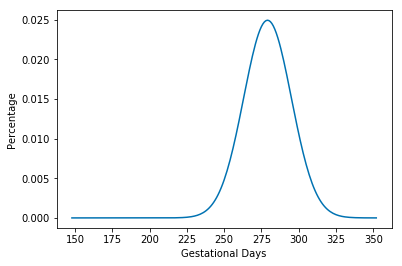

In [3]:
from scipy.stats.distributions import norm

gest_serie = df['Gestational Days']


gest_mean = gest_serie.mean()
gest_std = gest_serie.std()

X = np.arange(gest_serie.min(), gest_serie.max())
Y = norm.pdf(X, gest_mean, gest_std)
plt.plot(X,Y)
plt.xlabel('Gestational Days')
plt.ylabel('Percentage')

B) Para o número de dias de gestação, determine com 95% de o Intervalo de Confiança. Não utilize a técnica de bootstrap.

Retorne uma lista com os valores inferior e superior do intervalo de confiança.
Exemplo:
```python
return [inferior,superior]
```

In [4]:
def calcula_IC_gestacao(df):
    return [np.percentile(df['Gestational Days'], 2.5), np.percentile(df['Gestational Days'], 97.5)]

C) Na função abaixo, retorne o número da opção que melhor define o que indica o Intervalo de Confiança:

    1: A média da amostra está com 95% de probabilidade dentro do intervalo
    2: 95% dos valores da população estão dentro do intervalo
    3: O intervalo inclui a média da população com 95% de probabilidade
    4: 5% da amostra está a mais que 1.96 de distância da média da população
    5: Nenhuma das anteriores

In [5]:
def resposta():
    return 3

# Exercício 02:

Agora vamos calcular intervalos de confiança utilizando bootstrap.

A) Para a coluna "Maternal Age", plote um histograma dos valores.

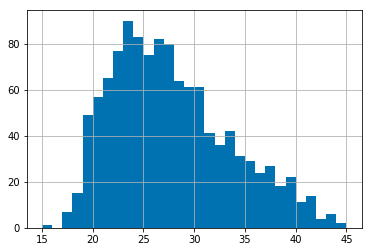

In [6]:
df['Maternal Age'].hist(bins=30)

B) Utilizando o mesmo atributo, execute um bootstrap com 5000 amostras e plote a distribuição das medianas.

Text(0, 0.5, '# Samples')

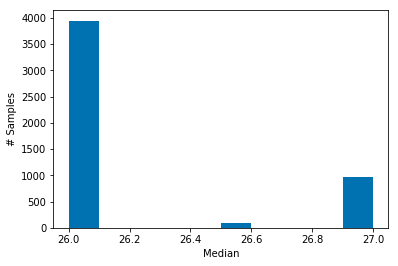

In [7]:
maternal_serie = df['Maternal Age']

N = 5000
sample_size = len(maternal_serie)
medians = []
for i in range(N):
    sample = maternal_serie.sample(sample_size, replace=True)
    medians.append(sample.median())
    
plt.hist(medians)
plt.xlabel("Median")
plt.ylabel("# Samples")

# Exercício 03:

Plote, em escala log-log, a distribuição dos dados no arquivo "lista.csv".

In [8]:
dados = pd.read_csv('lista.csv')['valores']

A) Calcule a média, mediana, variância, e desvio padrão. Retorne em uma lista da seguinte forma:
```python
return [media,mediana,var,desvio]
```

In [9]:
def ex3(dados):
    return [dados.mean(), dados.median(), dados.var(), dados.std()]

B) Calcule o intervalo de confiança, com confiança de 95%. Retorne em uma lista da seguinte forma:
```python
return [inferior,superior]
```

In [10]:
def ex3_IC(dados):
    return [np.percentile(dados, 2.5), np.percentile(dados, 97.5)]

C) Plote a distribuição dos valores dos dados, em escala log-log. 

(array([9.9987e+04, 6.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.57808050e-05, 1.00048761e+04, 2.00097522e+04, 3.00146283e+04,
        4.00195044e+04, 5.00243805e+04, 6.00292566e+04, 7.00341327e+04,
        8.00390088e+04, 9.00438849e+04, 1.00048761e+05, 1.10053637e+05,
        1.20058513e+05, 1.30063389e+05, 1.40068265e+05, 1.50073141e+05,
        1.60078018e+05, 1.7008

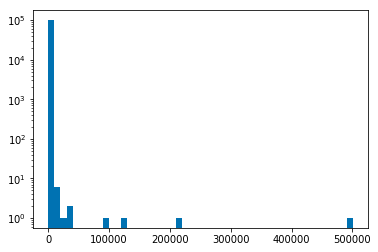

In [11]:
plt.hist(dados, bins=50, log=True)

D) Tente explicar o por quê de os valores calculados ficaram tão elevados.

O conjunto de dados possui *outliers* que estão muito distantes do restante dos dados. Para afirmar isto, basta olharmos para as medidas:

- Média: 19.50
- Mediana: 1.00
- Desvio padrão: 1804.88

Este desvio padrão nos indica que há outliers muito distantes da mediana e média.
Através do histograma em escala log-log com 50 *bins*, podemos visualizar esses outliers que estão puxando o valor da média e do desvio padrão para cima.